In [87]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', quotechar='"')

male_passenger=df.loc[df.Sex == 'male',:]
male_passenger_first_class=df.loc[((df.Sex=='male')&(df.Pclass==1)),:]

df.Embarked.fillna('C', inplace=True)

median_fare = df.loc[(df.Pclass == 3) & (df.Embarked=='S'),'Fare'].median()
df.Fare.fillna(median_fare, inplace=True)

In [88]:
#age_sex_median=df.groupby('Sex').Age.transform('median')
#df.Age.fillna(age_sex_median, inplace=True)

In [89]:
def GetTitle(name):   
    title_group={ 'mr':'Mr', 
             'mrs':'Mrs', 
             'miss':'Miss', 
             'master':'Master', 
             'don':'Sir', 
             'rev':'Sir', 
             'dr':'Officer', 
             'mme':'Mrs', 
             'ms':"Mrs",
             'major':'Officer',
             'lady':'Lady', 
             'sir':'Sir',
             'mlle':'Miss', 
             'col':'Officer', 
             'capt':'Officer', 
             'the countess':'Lady',
             'jonkheer':'Sir',
             'dona':'Lady'
            }
    first_name_with_title=name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title_group[title]

In [90]:
df['Title']=df.Name.map(lambda x: GetTitle(x))

In [91]:
title_age_median=df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [92]:
import numpy as np

In [93]:
df['Fare_Bin']=pd.qcut(df.Fare, 4 , labels=['very_low','low','high','very_high'])

In [94]:
df['AgeState']=np.where(df['Age']>=18,'Adult','Child')

In [95]:
df['FamilySize']=df.Parch+df.SibSp +1

In [96]:
df['IsMother']=np.where(((df.Sex=='female') & (df.Parch>0) & (df.Age>18) & (df.Title !='Miss')),1,0)

In [97]:
df.loc[df.Cabin=='T', 'Cabin']=np.NaN

In [98]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck']=df['Cabin'].map(lambda x:get_deck(x))

In [99]:
df['IsMale']=np.where(df.Sex=='male',1,0)

In [100]:
df=pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [101]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [102]:
columns=[column for column in df.columns if column != 'Survived']
columns=['Survived']+columns
df=df[columns]


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
Survived              891 non-null int64
PassengerId           891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int32
IsMale                891 non-null int32
Deck_A                891 non-null uint8
Deck_B                891 non-null uint8
Deck_C                891 non-null uint8
Deck_D                891 non-null uint8
Deck_E                891 non-null uint8
Deck_F                891 non-null uint8
Deck_G                891 non-null uint8
Deck_Z                891 non-null uint8
Pclass_1              891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Title_Lady            891 non-null uint8
Title_Master          891 non-null uint8
Title_Miss            891 non-null uint8
Title_Mr              891 non-

In [104]:
#Using linear regression
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)

#Taking the labels (Survived)
Y = df['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [147]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
linear_model.score(X_train, Y_train)

0.4503915434948118

In [107]:
linear_model.coef_

array([-1.66584491e-05, -4.13379065e-03,  8.58005094e-04, -6.56374206e-02,
        7.33636231e-02, -2.63220803e-01,  2.05945012e-02, -6.00512488e-02,
       -1.05109627e-01,  6.05294710e-02,  1.70682067e-01,  7.95163102e-02,
       -8.53448327e-02, -8.08166408e-02,  9.90362697e-02,  1.60593640e-02,
       -1.15095634e-01,  1.54920036e-01,  2.50091314e-01,  8.36587206e-03,
       -2.52234497e-01,  9.99348950e-02, -3.45145277e-02, -2.26563092e-01,
       -1.27882607e-03,  1.02934648e-02,  9.85199819e-03, -1.88666370e-02,
        1.82535960e-02,  1.80387388e-02, -3.62923348e-02, -1.56573012e-02,
        1.56573012e-02])

In [108]:
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


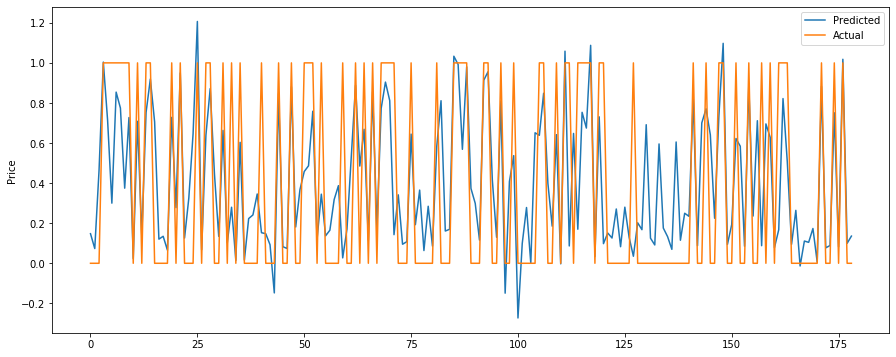

In [109]:
%pylab inline

pylab.rcParams['figure.figsize']=(15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [139]:
r_square = linear_model.score(x_test, y_test)
r_square

0.4543923572441896

In [111]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

0.12924571669163265

In [112]:
import math
math.sqrt(linear_model_mse)

0.35950760310685037

In [113]:
#Lasso demo
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.2, normalize=True)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [114]:
lasso_model.score(X_train, Y_train)

0.0

In [115]:
y_predict=lasso_model.predict(x_test)

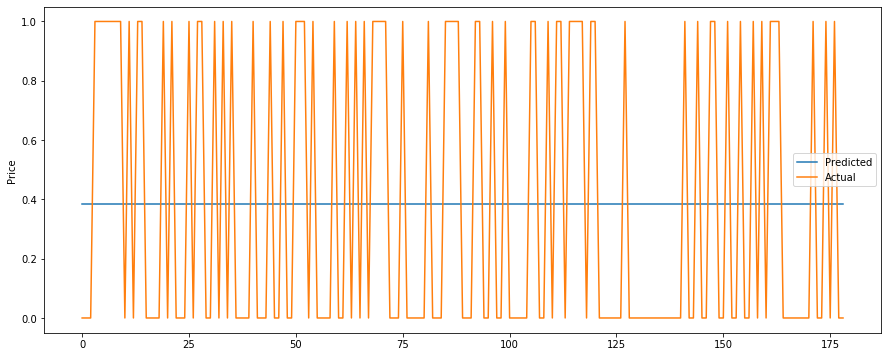

In [116]:
pylab.rcParams['figure.figsize']=(15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [117]:
r_square = lasso_model.score(x_test, y_test)
r_square

-1.770432003156408e-05

In [118]:
lasso_nodel_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_nodel_mse)

0.48671160480798953

In [135]:
#Ridge demo
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0, normalize=True)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [137]:
ridge_model.score(X_train, Y_train)

0.45039154349481175

In [121]:
y_predict = ridge_model.predict(x_test)

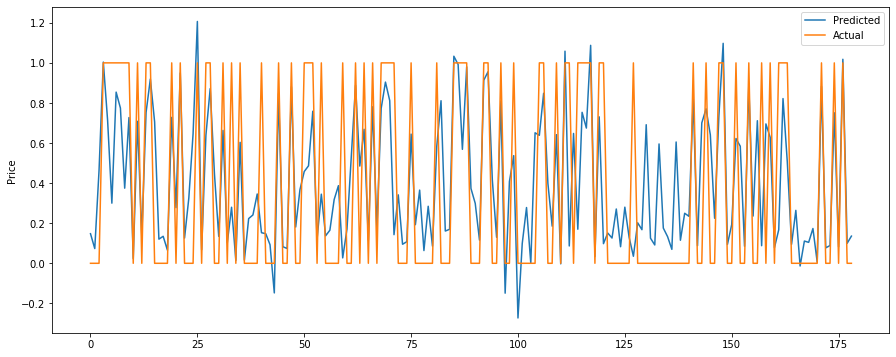

In [138]:
pylab.rcParams['figure.figsize']=(15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [126]:
import pandas as pd
import numpy as np

df_real=pd.read_csv('titanic_test.csv', quotechar='"')

male_passenger=df_real.loc[df_real.Sex == 'male',:]
male_passenger_first_class=df_real.loc[((df_real.Sex=='male')&(df_real.Pclass==1)),:]

df_real.Embarked.fillna('C', inplace=True)

median_fare = df_real.loc[(df_real.Pclass == 3) & (df_real.Embarked=='S'),'Fare'].median()
df_real.Fare.fillna(median_fare, inplace=True)

def GetTitle(name):   
    title_group={ 'mr':'Mr', 
             'mrs':'Mrs', 
             'miss':'Miss', 
             'master':'Master', 
             'don':'Sir', 
             'rev':'Sir', 
             'dr':'Officer', 
             'mme':'Mrs', 
             'ms':"Mrs",
             'major':'Officer',
             'lady':'Lady', 
             'sir':'Sir',
             'mlle':'Miss', 
             'col':'Officer', 
             'capt':'Officer', 
             'the countess':'Lady',
             'jonkheer':'Sir',
             'dona':'Lady'
            }
    first_name_with_title=name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title_group[title]
	
	
df_real['Title']=df_real.Name.map(lambda x: GetTitle(x))



title_age_median=df_real.groupby('Title').Age.transform('median')
df_real.Age.fillna(title_age_median, inplace=True)

df_real['Fare_Bin']=pd.qcut(df_real.Fare, 4 , labels=['very_low','low','high','very_high'])



df_real['AgeState']=np.where(df_real['Age']>=18,'Adult','Child')

df_real['FamilySize']=df_real.Parch+df_real.SibSp +1


df_real['IsMother']=np.where(((df_real.Sex=='female') & (df_real.Parch>0) & (df_real.Age>18) & (df_real.Title !='Miss')),1,0)


df_real.loc[df_real.Cabin=='T', 'Cabin']=np.NaN


def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df_real['Deck']=df_real['Cabin'].map(lambda x:get_deck(x))


df_real['IsMale']=np.where(df_real.Sex=='male',1,0)

df_real=pd.get_dummies(df_real,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])


df_real.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)


In [140]:
y_predict_test = linear_model.predict(df_real)
myList = [int(x) for x in y_predict_test]
df_submission=pd.DataFrame({'PassengerId':df_real.PassengerId,'Survived':myList})
df_submission.to_csv("submission7.csv",index=False)

In [141]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int32
IsMale                418 non-null int32
Deck_A                418 non-null uint8
Deck_B                418 non-null uint8
Deck_C                418 non-null uint8
Deck_D                418 non-null uint8
Deck_E                418 non-null uint8
Deck_F                418 non-null uint8
Deck_G                418 non-null uint8
Deck_Z                418 non-null uint8
Pclass_1              418 non-null uint8
Pclass_2              418 non-null uint8
Pclass_3              418 non-null uint8
Title_Lady            418 non-null uint8
Title_Master          418 non-null uint8
Title_Miss            418 non-null uint8
Title_Mr              418 non-null uint8
Title_Mrs             418 non-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Baseline model 

In [123]:
from sklearn.dummy import DummyClassifier

NameError: name 'titanic_test_data' is not defined

In [143]:
model_dummy=DummyClassifier(strategy='most_frequent',random_state=0)

In [144]:
model_dummy.fit(X_train,Y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [153]:
print('score for baseline model : {0:.2f}'.format(model_dummy.score(x_test, y_test)))

score for baseline model : 0.61


In [155]:
y_predict_test = model_dummy.predict(df_real)
myList = [int(x) for x in y_predict_test]
df_submission=pd.DataFrame({'PassengerId':df_real.PassengerId,'Survived':myList})
df_submission.to_csv("submission9.csv",index=False)

### Logistic Regression Model

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
model_lr_1=LogisticRegression(random_state=0)

In [158]:
model_lr_1.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
print('score for logistic regression - version 1: {0:.2f}'.format(model_lr_1.score(x_test,y_test)))

score for logistic regression - version 1: 0.83


In [164]:
y_predict_test = model_lr_1.predict(df_real)
myList = [int(x) for x in y_predict_test]
df_submission=pd.DataFrame({'PassengerId':df_real.PassengerId,'Survived':myList})
df_submission.to_csv("submission10.csv",index=False)

### Hyperparameter Optimization

In [165]:
model_lr = LogisticRegression(random_state=0)

In [166]:
from sklearn.model_selection import GridSearchCV

In [168]:
parameters= {'C':[1.0,10.0,50.0,100.0,1000.0], 'penalty':['l1','l2']}
clf=GridSearchCV(model_lr, param_grid=parameters, cv=3)

In [169]:
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [170]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [171]:
print('best score:{0:.2f}'.format(clf.best_score_))

best score:0.83


In [172]:
print('score for logistic regression - version 2:{0:.2f}'.format(clf.score(x_test,y_test)))

score for logistic regression - version 2:0.83


In [173]:
y_predict_test = clf.predict(df_real)
myList = [int(x) for x in y_predict_test]
df_submission=pd.DataFrame({'PassengerId':df_real.PassengerId,'Survived':myList})
df_submission.to_csv("submission11.csv",index=False)